In [3]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import os
import random

# Load the model and processor
processor = ViTImageProcessor.from_pretrained('nateraw/food')
model = ViTForImageClassification.from_pretrained('nateraw/food')

# Load your image (use your own image path here)
main_directory = '../dataset_padang_food'

# Pilih folder dan gambar acak dari dataset seperti sebelumnya
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]
random_folder = random.choice(folders)
random_folder_path = os.path.join(main_directory, random_folder)
image_files = [f for f in os.listdir(random_folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(random_folder_path, random_image_file)

image = Image.open(random_image_path)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Run the image through the model
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()

print(f"Predicted class index: {predicted_class_idx}")


Predicted class index: 4


In [2]:
print(f"Predicted class index: {predicted_class_idx}")

Predicted class index: 77


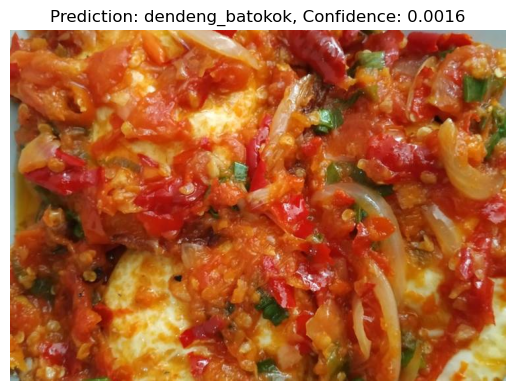

Top 3 Predictions:
dendeng_batokok: 0.0016
telur_balado: 0.0011
daging_rendang: 0.0011


In [10]:
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Load the model and processor from Hugging Face
processor = ViTImageProcessor.from_pretrained('nateraw/food')
model = ViTForImageClassification.from_pretrained('nateraw/food')

# Path to the main dataset folder
main_directory = '../dataset_padang_food'

# Select a random folder and image
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]
random_folder = random.choice(folders)
random_folder_path = os.path.join(main_directory, random_folder)
image_files = [f for f in os.listdir(random_folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(random_folder_path, random_image_file)

# Load the image
image = Image.open(random_image_path)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Run the image through the model
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class probabilities
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Custom labels sesuai dataset makanan Padang
labels = ['ayam_goreng', 'ayam_pop', 'daging_rendang', 'dendeng_batokok', 'gulai_ikan', 'gulai_tambusu', 'gulai_tunjang', 'telur_balado', 'telur_dadar']

# Limit probabilities to match the number of custom labels
probabilities = probabilities[0][:len(labels)]

# Show top 3 predictions
top_probs, top_idxs = torch.topk(probabilities, 3)

# Display top predictions with custom labels
top_labels = [labels[i] for i in top_idxs]  # Get top labels

# Display the image and the top prediction
plt.imshow(image)
plt.title(f"Prediction: {top_labels[0]}, Confidence: {top_probs[0].item():.4f}")
plt.axis('off')  # Hide axes for a better view
plt.show()

# Display the top 3 predictions
print("Top 3 Predictions:")
for i in range(3):
    print(f"{top_labels[i]}: {top_probs[i].item():.4f}")
